In [277]:
import numpy as np
import matplotlib.pyplot as plt

In [278]:
point1 = np.random.uniform(-1, 1, 2)
point2 = np.random.uniform(-1, 1, 2)
# Calculate the coefficients of the line
a = (point2[1] - point1[1]) / (point2[0] - point1[0])
b = point1[1] - a * point1[0]

# Define the target function
def f(x):
    return np.sign(a * x[0] + b - x[1])

In [279]:
# Number of data points
num_points = 100

# Generate random data points and labels
X = np.random.uniform(-1, 1, (num_points, 2))
y = np.array([f(x) for x in X])

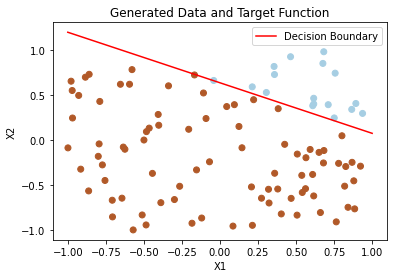

In [280]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary (line)
x_line = np.linspace(-1, 1, 100)
y_line = a * x_line + b
plt.plot(x_line, y_line, '-r', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Data and Target Function')
plt.legend()
plt.show()


In [281]:
X_pseudo_inverse = np.linalg.pinv(X)
weights = np.dot(X_pseudo_inverse,y)

In [282]:
weights = np.dot(X_pseudo_inverse,y)

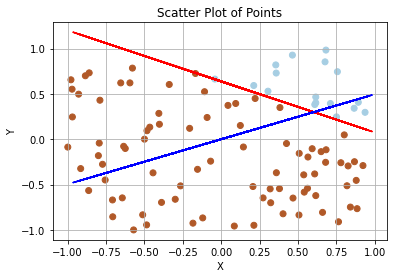

In [283]:
w1=weights[0]
w2=weights[1]
# Unzip the points for plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
line_y = np.array(x) * a+ b
line_z = -(w1 / w2) * np.array(x)/w2
# Plot the points

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Points')
plt.grid(True)
plt.plot(x, line_y, c='r')
plt.plot(x, line_z, c='b')
plt.show()

In [284]:
# Assuming X and y are your data points and labels, and you've already calculated 'weights'
# Compute the predicted labels using the linear regression model
predicted_labels = np.sign(np.dot(X, weights))

# Calculate the number of misclassified points
misclassified = np.sum(predicted_labels != y)

# Calculate the in-sample error as the ratio of misclassified points to the total number of data points
in_sample_error = (misclassified / len(y))

print("In-Sample Error:", in_sample_error)


In-Sample Error: 0.32


In [285]:
# Number of out-of-sample data points
num_out_of_sample_points = 1000

# Generate random out-of-sample data points
X_out_of_sample = np.random.uniform(-1, 1, (num_out_of_sample_points, 2))
y_out_of_sample = np.array([f(x) for x in X_out_of_sample])

# Compute the predicted labels for the out-of-sample data using the trained model
predicted_labels_out_of_sample = np.sign(np.dot(X_out_of_sample, weights))

# Calculate the number of misclassified out-of-sample points
misclassified_out_of_sample = np.sum(predicted_labels_out_of_sample != y_out_of_sample)

# Calculate the out-of-sample error as the ratio of misclassified points to the total number of out-of-sample data points
out_of_sample_error = misclassified_out_of_sample / num_out_of_sample_points

print("Out-of-Sample Error:", out_of_sample_error)


Out-of-Sample Error: 0.302


In [346]:
# Define the target function (the actual line)
def f(x):
    return np.sign(x[1] - x[0]+0.25)

# Number of experiments
num_experiments = 1000


# Number of data points
N = 10

# Maximum number of iterations for PLA
max_iterations = 10000  # Set a reasonable value

# Initialize a variable to store the total number of iterations over all experiments
total_iterations = 0

# Lists to store the coordinates of the points on the actual line
actual_line_x = [-1, 1]
actual_line_y = [1, -1]
# Lists to store all scatter points
scatter_points_x = []
scatter_points_y = []




In [357]:
for _ in range(1):
    # Generate a random dataset for each experiment
    X_train = np.random.uniform(-1, 1, (N, 2))
    y_train = np.array([f(x) for x in X_train])
    # Use linear regression to find the initial weights and bias for PLA
    X_extended = np.column_stack((X_train, np.ones(N)))  # Add a bias term
    X_pseudo_inverse = np.linalg.pinv(X_extended)
    weights_bias = np.dot(X_pseudo_inverse, y_train)
    # Initialize PLA weights and bias with linear regression values
    pla_weights = weights_bias[:-1]
    pla_bias = weights_bias[-1]
    # Implement PLA with a maximum number of iterations
    iterations = 0
    while iterations < max_iterations:
        # Compute the predicted labels using the current PLA weights and bias
        predicted_labels = np.sign(np.dot(X_extended, np.append(pla_weights, pla_bias)))
        
        # Check for misclassified points
        misclassified_indices = np.where(predicted_labels != y_train)[0]
        
        if len(misclassified_indices) == 0:
            # Convergence reached, all points correctly classified
            break
        
        # Randomly choose a misclassified point
        random_misclassified_index = np.random.choice(misclassified_indices)
        
        # Update PLA weights and bias using the chosen misclassified point
        pla_weights += y_train[random_misclassified_index] * X_train[random_misclassified_index]
        pla_bias += y_train[random_misclassified_index]
        
        iterations += 1
    
    # Add the number of iterations for this experiment to the total
    total_iterations += iterations
    
    # Add scatter points to the lists
    scatter_points_x.extend(X_train[:, 0])
    scatter_points_y.extend(X_train[:, 1])

# Calculate the average number of iterations over all experiments
average_iterations = total_iterations / num_experiments

[-1.  1.  1. -1.  1. -1.  1.  1.  1.  1.]
[-1. -1. -1. -1.  1. -1. -1. -1.  1. -1.]
[-1.  1.  1. -1.  1. -1.  1.  1.  1.  1.]
[-1. -1. -1. -1.  1. -1. -1. -1.  1. -1.]
[-1.  1.  1. -1.  1. -1.  1.  1.  1.  1.]
[-1. -1. -1. -1.  1. -1. -1. -1.  1. -1.]
[-1.  1.  1. -1.  1. -1.  1.  1.  1.  1.]
[-1. -1. -1. -1.  1. -1. -1. -1.  1. -1.]
[-1.  1.  1. -1.  1. -1.  1.  1.  1.  1.]
[-1.  1.  1. -1.  1. -1.  1. -1.  1. -1.]
[-1.  1.  1. -1.  1. -1.  1. -1.  1.  1.]


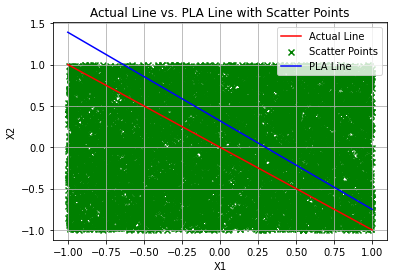

Average Number of Iterations: 5.669


In [348]:
# Plot the actual line (as a line segment), scatter points, and PLA Line
plt.plot(actual_line_x, actual_line_y, c='r', label='Actual Line')
plt.scatter(scatter_points_x, scatter_points_y, c='g', marker='x', label='Scatter Points')
plt.plot([-1, 1], [(-pla_weights[0] + pla_bias) / pla_weights[1], (pla_weights[0] + pla_bias) / pla_weights[1]], c='b', label='PLA Line')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Actual Line vs. PLA Line with Scatter Points')
plt.legend()
plt.grid(True)
plt.show()

print("Average Number of Iterations:", average_iterations)